# Práctica 4
## [Introducción a los sistema inteligentes](https://fagonzalezo.github.io/)
### Universidad Nacional de Colombia

### **Funciones Auxiliares**


In [1]:
import sys
import pylab as pl
import numpy as np

sys.path.append("..")

from AI_algorithms.utils.plot import plot_data, plot_decision_region, plot_losses

### **Clasificación con funciones lineales**

Dado el siguiente conjunto de datos:

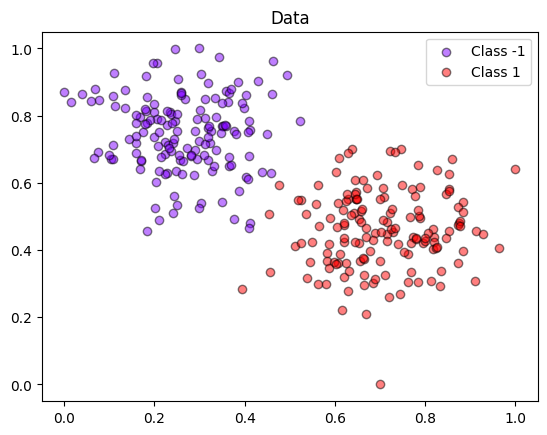

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=115)
X = minmax_scale(X)
y = 2 * y - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Queremos encontrar una función lineal $f(x) = wx+w_0$ con parámetros $w \in \mathbb{R}^2$, $w_0 \in \mathbb{R}$. Formulamos el problema como un problema de optimización:

$$\min_{f\in H}L(f,D)$$

Donde:
* $H$ es el espacio de hipótesis definido como $H=\{f_{w, w_0}(x)=wx+w_0,\forall w\in\mathbb{R}^2 \ and \ w_0\in\mathbb{R}\}$.
* $L$ es la función de pérdida definida como $ L(f, D) =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} (f(x^{(i)}) - y^{(i)})^2 $.
* $(x^{(i)},y^{(i)})$ es una muestra de entrenamiento donde $y^{(i)}$ es la entrada y $y^{(i)}$ es la etiqueta.
* $D$ corresponde al conjunto de datos de entrenamiento.



Utilizaremos descenso de gradiente para minimizar la pérdida. Para ello necesitamos calcular el gradiente de la función de pérdida con respecto a los parámetros.


$$
\begin{aligned} \frac{\partial L(f, D)}{\partial w} & =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} \frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w}  
\end{aligned}
$$
con
$$
\begin{aligned}
\frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w} & =
\frac{\partial (w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_0 - y^{(i)})^2}{\partial w} \\
& =(f_{w}(x^{(i)})-y^{(i)})\left[\begin{array}{c}
1 \\
x_1^{(i)}\\
x_2^{(i)}\\
\end{array}\right]
\end{aligned}
$$

En la clase [`Linear Classifier`](https://github.com/omardtl24/ISI2025-1/blob/main/AI_algorithms/ml/supervised/linear/LinearClassifier.py) se puede encontrar la implementación completa de este modelo usando gradiente descendente. Este modelo parte de una clase abstracta [`GradientDescentSupervisedModel`](https://github.com/omardtl24/ISI2025-1/blob/main/AI_algorithms/ml/supervised/base.py) que contiene la estructura del gradiente descendente por batches y el gradiente decsendente estocástico.

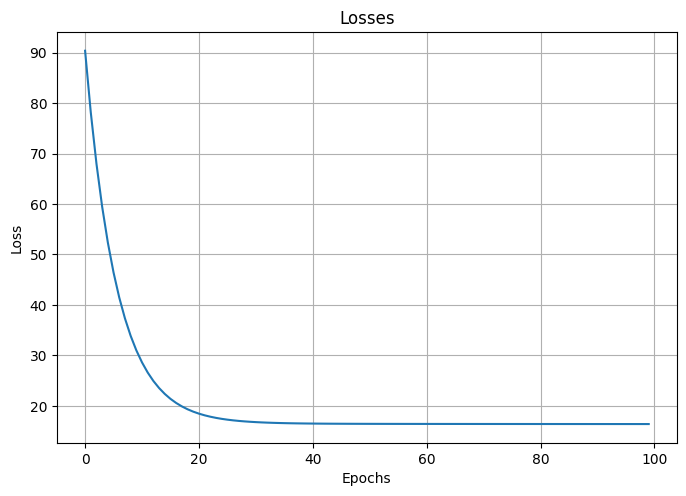

In [3]:
from AI_algorithms.ml.supervised.linear import LinearClassifier

w_ini = np.array([0, 0, 0])
model = LinearClassifier(w_ini)
losses = model.fit(X_train, y_train,
                   learning_rate=0.005,
                   epochs=100, verbose=False)
plot_losses(losses)

Podemos ver el resultado final del modelo después del proceso de entrenamiento

Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: 0.0017820180571504474
Training loss: 16.391830274003727
Test loss: 5.951871252496365


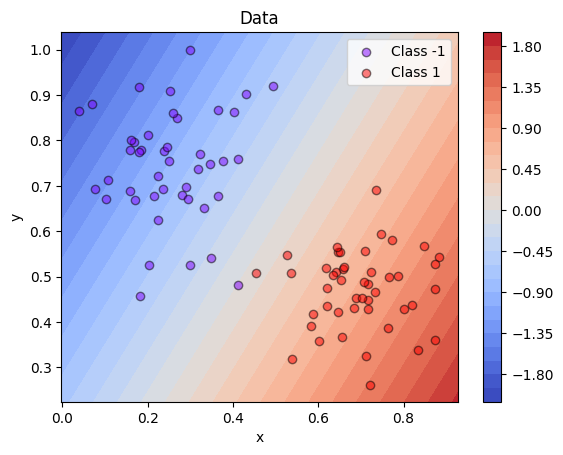

In [4]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.f(X[0])))
print(f'Training loss: {model.loss(X_train, y_train)}')
print(f'Test loss: {model.loss(X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: model.f([x_1, x_2]))
plot_data(X_test, y_test)

Y finalmente gráficamos la frontera de decisión resultante para las clases propuestas

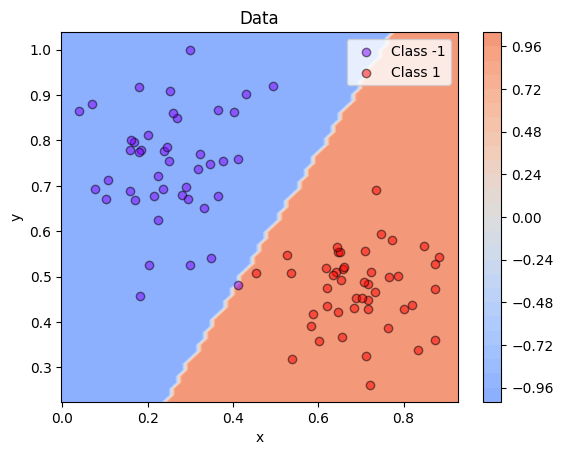

In [5]:
plot_decision_region(X_test, lambda x_1, x_2: model.predict([x_1, x_2]))
plot_data(X_test, y_test)

## 1. Error de entrenamiento y error prueba

Calcule el número (y el porcentaje) de muestras entrenamiento clasificadas incorrectamente. Haga lo mismo con las muestras de prueba.

In [6]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'Total number of training samples: {len(X_train)}')
print(f'Total number of test samples: {len(X_test)}', end = '\n\n')

print(f'Total number of training missclassified samples: {y_train.shape[0] - np.sum(y_train == y_pred_train)}')
print(f'Total number of test missclassified samples: {y_test.shape[0] - np.sum(y_test == y_pred_test)}', end = '\n\n')

print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test) : .2f}')
print(f'Train Accuracy: {accuracy_score(y_train, y_pred_train) : .2f}', end = '\n\n')

print(f'Test Error: {1-accuracy_score(y_test, y_pred_test) : .2f}')
print(f'Train Error: {1-accuracy_score(y_train, y_pred_train) : .2f}', end = '\n\n')

print(f'Test Error (%): {(1-accuracy_score(y_test, y_pred_test))*100 : .2f} %')
print(f'Train Error (%): {(1-accuracy_score(y_train, y_pred_train))*100 : .2f} %')

Total number of training samples: 210
Total number of test samples: 90

Total number of training missclassified samples: 2
Total number of test missclassified samples: 1

Test Accuracy:  0.99
Train Accuracy:  0.99

Test Error:  0.01
Train Error:  0.01

Test Error (%):  1.11 %
Train Error (%):  0.95 %


## 2. Nuevo conjunto de datos

Dado el siguiente conjunto de datos:

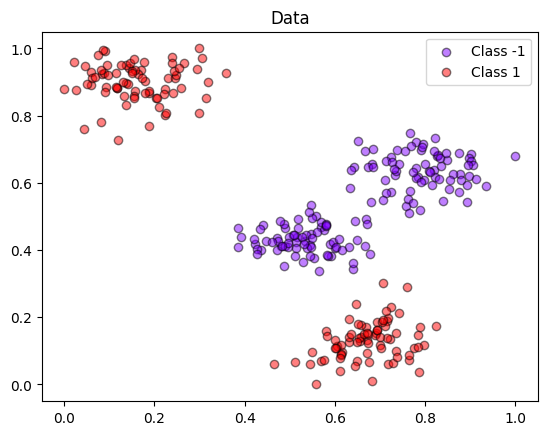

In [7]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=109)
X = minmax_scale(X)
y = 2 * (y % 2) - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

* Entrene un modelo lineal.
* Grafique los datos con las regiones de decisión para cada clase.
* Calcule el error de entrenamiento y el error de prueba.
* Discuta los resultados.

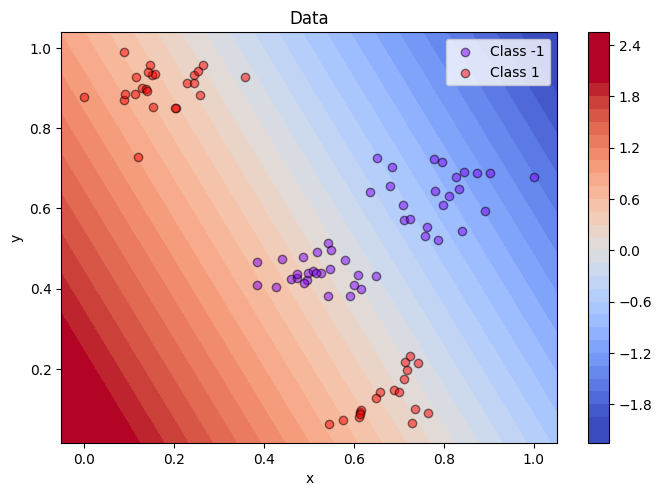

In [8]:
w_ini = np.array([0, 0, 0])
model = LinearClassifier(w_ini)
_ = model.fit(X_train, y_train,
                   learning_rate=0.005,
                   epochs=100, verbose=False)
pl.figure(figsize = (8,16/3))
plot_decision_region(X_test, lambda x_1, x_2: model.f([x_1, x_2]))
plot_data(X_test, y_test)

Input features: [0.7232232 0.1363957]
True label: 1
Predicted label: 0.09590419181353393
Training loss: 61.73508677128563
Test loss: 29.494037340805864


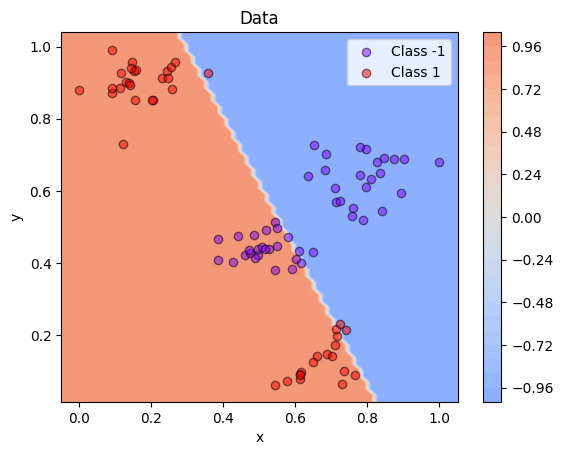

In [9]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.f(X[0])))
print(f'Training loss: {model.loss(X_train, y_train)}')
print(f'Test loss: {model.loss(X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: model.predict([x_1, x_2]))
plot_data(X_test, y_test)

## 3. Modelo cuadratico

Modifique el código anterior para entrenar un modelo cuadrático
$$
f_w(x)=w_1 x_1^2 + w_2 x_2^2 + w_3 x_1 x_2 + w_4 x_1 + w_5 x_2 + w_0
$$

**Pista:** no hay necesidad de crear nuevas funciones solo crear un nuevo dataset.

* Grafique los datos con las regiones de decisión para cada clase.
* Calcule el error de entrenamiento y el error de prueba.
* Discuta los resultados.

## 4. Conjunto de datos de círculos

Repita el anterior punto con este nuevo conjunto de datos:

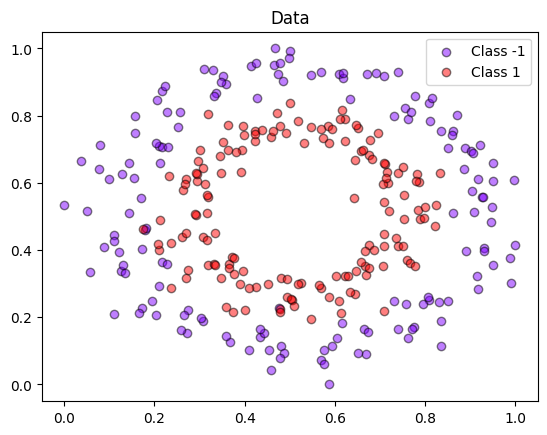

In [10]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, noise=0.1, factor=0.6, random_state=109)
X = minmax_scale(X)
y = 2 * (y % 2) - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Para poder realizar el proceso de ajuste para el modeo cuadratico, vamos a convertir nuestro vector de elementos:

$$\vec{x_i} = \left[\begin{array}{c}
x_1^{(i)}\\
x_2^{(i)}\\
\end{array}\right]$$

en un vector de elementos:

$$\vec{x_i} = \left[\begin{array}{c}
(x_1^{(i)})^2\\
(x_2^{(i)})^2\\
x_1^{(i)}\\
x_2^{(i)} x_1^{(i)}\\
x_2^{(i)}\\
\end{array}\right]$$

al cual se le aplicara, el proceso de clasificación lineal que ya fue diseñado. Este modelo fue entrenado usando gradiente descendente estocastico dado que se identificó que el modelo era muy sensible y divergía con facilidad.



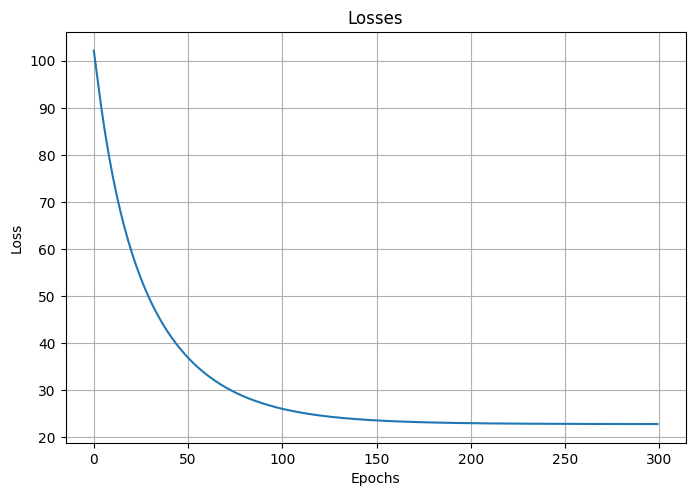

In [11]:
def convertInput(X):
    X = np.atleast_2d(X)
    XCrossed = X[:, 0] * X[:, 1]
    XCrossed = XCrossed.reshape(-1, 1)
    X2 = X**2
    return np.concatenate((X, XCrossed, X2), axis=1)

w_ini = np.array([0, 0, 0, 0, 0, 0])
model = LinearClassifier(w_ini)
losses = model.fit(convertInput(X_train), y_train,
                   learning_rate=0.1,
                   epochs=300, verbose=False, mode = 'stochastic')

plot_losses(losses)

Input features: [0.69222952 0.92641933]
True label: -1
Predicted label: [-1.09808609]
Training loss: 22.792209781665232
Test loss: 11.528619936772806


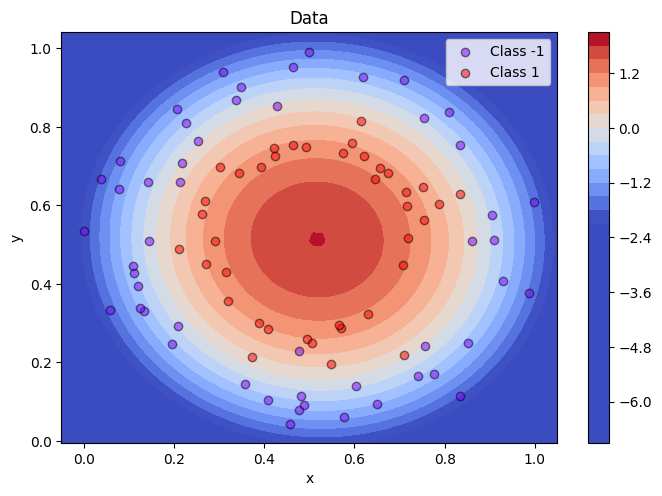

In [12]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.f(convertInput(X[0]))))
print(f'Training loss: {model.loss(convertInput(X_train), y_train)}')
print(f'Test loss: {model.loss(convertInput(X_test), y_test)}')
pl.figure(figsize = (8,16/3))
plot_decision_region(X_test, lambda x_1, x_2: model.f(convertInput(np.array([x_1, x_2]))))
plot_data(X_test, y_test)

Input features: [0.69222952 0.92641933]
True label: -1
Predicted label: [-1.]
Training loss: 22.792209781665232
Test loss: 11.528619936772806


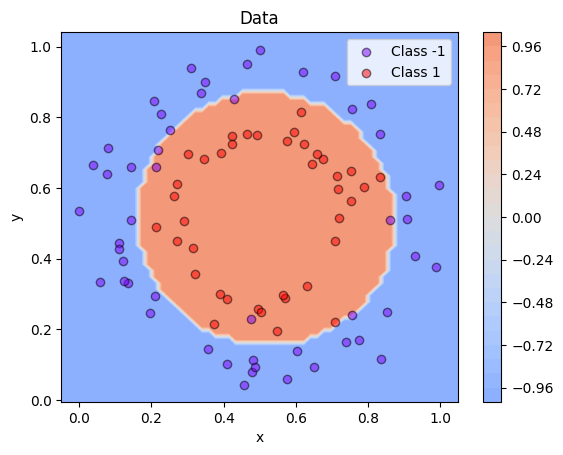

In [13]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.predict(convertInput(X[0]))))
print(f'Training loss: {model.loss(convertInput(X_train), y_train)}')
print(f'Test loss: {model.loss(convertInput(X_test), y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: model.predict(convertInput(np.array([x_1, x_2]))))
plot_data(X_test, y_test)

## 5. Acotando la salida del modelo

Un problema con el modelo lineal original, y también con el cuadrático, es que su salida no está acotada. ¿Se le ocurre alguna forma de acotar la salida del modelo de forma que esté en el rango $[-1,1]$?



Una forma sencilla para acotar la salida entre estos valores es tomar la salida de la función lineal y pasarla por una función definida en los reales cuya salida este definida en un intervalo entre -1 y 1.

Para esta tarea, se proponen dos funciones candidatas (Las llamamos candidatas porque su comportamiento no es del todo acotado entre -1 y 1, pero se pueden modificar):

### 1. $\arctan(x)$

![Arctan function](https://www.formulasexplicadas.com/wp-content/uploads/2024/10/grafica-arcotangente.png)

La función arcotangente se encuentra acotada entre $-\frac{\pi}{2}$ y $\frac{\pi}{2}$, por lo que para poder usarla en nuestro problema, la dividiremos entre $\frac{\pi}{2}$. Esto nos permite definir la función $g_1(x)$ que nos da una predicción acotada entre -1 y 1 dada la función $f_w(x)$:

$$g_1(x) = \dfrac{2}{\pi} \arctan{f_w(x)}$$


### 1. $\sigma(x) = \frac{1}{1+e^{-x}}$

![Sigmoid function](https://interactivechaos.com/sites/default/files/2023-03/tutorial_ml_0057.png)

La función sigmoide esta acotada entre 0 y 1, por consiguiente, para poder usarla en nuestro contexto, se multiplicara por 2 (Para que quede entre 0 y 2) y se le restará 1 (Para que quede entre 0 y 1). Esto nos permite definir la función $g_2(x)$ que nos da una predicción acotada entre 0 y 1 dada la función $f_w(x)$:

$$g_2(x) = 2 \sigma{(f_w(x))} - 1$$

Podemos probar estas funciones sobre las salidas de nuestro modelo  cuadrático en el caso de las clases no lineales (Circulos) para ver como cambia el resultado respecto al modelo sin acotar

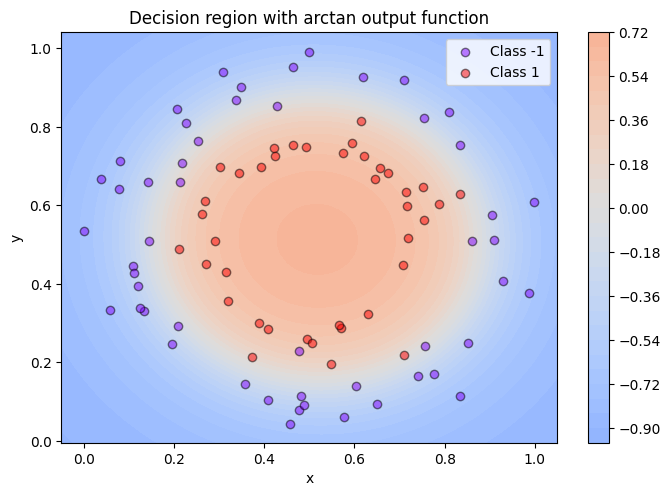

In [14]:
def modifiedArctan(x):
    return 2/np.pi * np.arctan(x)

pl.figure(figsize = (8,16/3))
plot_decision_region(X_test, lambda x_1, x_2: modifiedArctan(model.f(convertInput(np.array([x_1, x_2])))))
plot_data(X_test, y_test, title = 'Decision region with arctan output function')

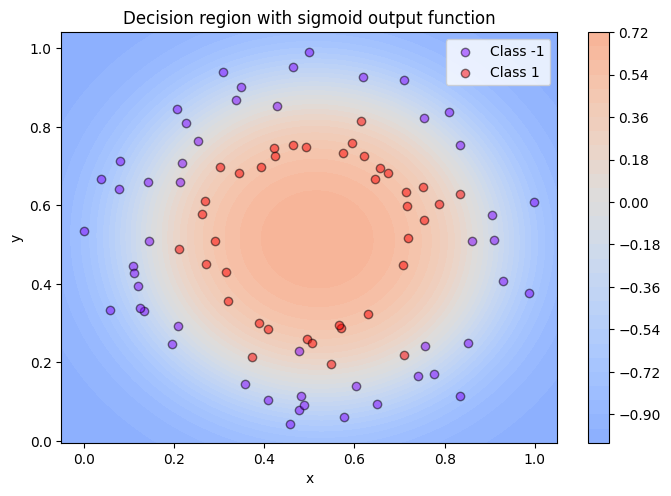

In [15]:
def modifiedSigmoid(x):
    return 2 * (1/(1 + np.exp(-x))) - 1

pl.figure(figsize = (8,16/3))
plot_decision_region(X_test, lambda x_1, x_2: modifiedSigmoid(model.f(convertInput(np.array([x_1, x_2])))))
plot_data(X_test, y_test, title = 'Decision region with sigmoid output function')

Es evidente que ahora, nuestras salidas están acotadas entre $-1$ y $1$ dado el enfoque de funciones aplicadas a la salida del modelo